In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv("airline.csv")

In [5]:
df.shape

(67663, 18)

In [6]:
df.head()

Airline ID Name_Airline Country_Airline Active  Source airport ID  \
0       410.0   Aerocondor        Portugal      Y             2965.0   
1       410.0   Aerocondor        Portugal      Y             2966.0   
2       410.0   Aerocondor        Portugal      Y             2966.0   
3       410.0   Aerocondor        Portugal      Y             2968.0   
4       410.0   Aerocondor        Portugal      Y             2968.0   

   Destination airport ID                    Name_Source  City_Source  \
0                  2990.0    Sochi International Airport        Sochi   
1                  2990.0              Astrakhan Airport    Astrakhan   
2                  2962.0              Astrakhan Airport    Astrakhan   
3                  2990.0  Chelyabinsk Balandino Airport  Chelyabinsk   
4                  4078.0  Chelyabinsk Balandino Airport  Chelyabinsk   

  Country_Source  Latitude_Source  Longitude_Source  \
0         Russia        43.449902         39.956600   
1         Russia        46.283298         48.006302   
2         Russia        46.283298         48.006302   
3         Russia        55.305801         61.503300   
4         Russia        55.305801         61.503300   

              Name_Destination City_Destination Country_Destination  \
0  Kazan International Airport            Kazan              Russia   
1  Kazan International Airport            Kazan              Russia   
2     Mineralnyye Vody Airport  Mineralnye Vody              Russia   
3  Kazan International Airport            Kazan              Russia   
4           Tolmachevo Airport      Novosibirsk              Russia   

   Latitude_Destination  Longitude_Destination  Stops Equipment  
0             55.606201              49.278702      0       CR2  
1             55.606201              49.278702      0       CR2  
2             44.225101              43.081902      0       CR2  
3             55.606201              49.278702      0       CR2  
4             55.012600              82.650703      0       CR2

In [7]:
di=df[['Name_Airline','Name_Source',
        'Country_Source', 'Latitude_Source', 'Longitude_Source',
       'Name_Destination',  'Country_Destination',
       'Latitude_Destination', 'Longitude_Destination',]]

In [8]:
di.head(10)

Name_Airline                       Name_Source Country_Source  \
0   Aerocondor       Sochi International Airport         Russia   
1   Aerocondor                 Astrakhan Airport         Russia   
2   Aerocondor                 Astrakhan Airport         Russia   
3   Aerocondor     Chelyabinsk Balandino Airport         Russia   
4   Aerocondor     Chelyabinsk Balandino Airport         Russia   
5   Aerocondor  Domodedovo International Airport         Russia   
6   Aerocondor  Domodedovo International Airport         Russia   
7   Aerocondor  Domodedovo International Airport         Russia   
8   Aerocondor  Domodedovo International Airport         Russia   
9   Aerocondor    Belgorod International Airport         Russia   

   Latitude_Source  Longitude_Source             Name_Destination  \
0        43.449902         39.956600  Kazan International Airport   
1        46.283298         48.006302  Kazan International Airport   
2        46.283298         48.006302     Mineralnyye Vody Airport   
3        55.305801         61.503300  Kazan International Airport   
4        55.305801         61.503300           Tolmachevo Airport   
5        55.408798         37.906300  Kazan International Airport   
6        55.408798         37.906300            Begishevo Airport   
7        55.408798         37.906300                          NaN   
8        55.408798         37.906300              Bugulma Airport   
9        50.643799         36.590099            Khrabrovo Airport   

  Country_Destination  Latitude_Destination  Longitude_Destination  
0              Russia             55.606201              49.278702  
1              Russia             55.606201              49.278702  
2              Russia             44.225101              43.081902  
3              Russia             55.606201              49.278702  
4              Russia             55.012600              82.650703  
5              Russia             55.606201              49.278702  
6              Russia             55.564701              52.092499  
7                 NaN                   NaN                    NaN  
8              Russia             54.639999              52.801701  
9              Russia             54.889999              20.592600

In [9]:
df.isnull().sum()

Airline ID                479
Name_Airline              479
Country_Airline           479
Active                    479
Source airport ID         220
Destination airport ID    221
Name_Source               483
City_Source               483
Country_Source            483
Latitude_Source           483
Longitude_Source          483
Name_Destination          488
City_Destination          488
Country_Destination       488
Latitude_Destination      488
Longitude_Destination     488
Stops                       0
Equipment                  18
dtype: int64

In [10]:
df.dropna(axis='rows',inplace=True)

In [11]:
df.shape

(66300, 18)

In [12]:
!pip install geodatasets
import geopandas as gpd
import geodatasets

Defaulting to user installation because normal site-packages is not writeable


In [13]:
display(df['Name_Destination'][0:5],df['Name_Source'][0:5])

0    Kazan International Airport
1    Kazan International Airport
2       Mineralnyye Vody Airport
3    Kazan International Airport
4             Tolmachevo Airport
Name: Name_Destination, dtype: object

0      Sochi International Airport
1                Astrakhan Airport
2                Astrakhan Airport
3    Chelyabinsk Balandino Airport
4    Chelyabinsk Balandino Airport
Name: Name_Source, dtype: object

In [14]:
import plotly.graph_objects as go
import pandas as pd

df_sample = df.iloc[:2000]


fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon=df_sample['Longitude_Source'],
    lat=df_sample['Latitude_Source'],
    text=df_sample['City_Source'] + ' - ' + df_sample['Country_Source'],
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Source Airports'
))

fig.update_geos(
    projection_type="orthographic",  # Creates a 3D spherical effect
    showland=True, landcolor="rgb(230, 230, 230)",
    showocean=True, oceancolor="rgb(150, 200, 255)"
)

fig.update_layout(title="3D Interactive World Map with Source Airports", height=700)

fig.show()


In [15]:
import plotly.graph_objects as go
import pandas as pd

df_sample = df.iloc[:2000]

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon=df_sample['Longitude_Destination'],
    lat=df_sample['Latitude_Destination'],
    text=df_sample['City_Destination'] + ' - ' + df_sample['Country_Destination'],
    mode='markers',
    marker=dict(size=4, color='red'),
    name='Destination Airports'
))

fig.update_geos(
    projection_type="orthographic",  # Creates a 3D spherical effect
    showland=True, landcolor="rgb(230, 230, 230)",
    showocean=True, oceancolor="rgb(150, 200, 255)"
)


fig.update_layout(title="3D Interactive World Map with Destination Airports", height=700)

fig.show()


In [16]:
import plotly.graph_objects as go
import pandas as pd
from IPython.core.display import display, HTML

df_sample = df.iloc[:2000]
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    lon=df_sample['Longitude_Source'],
    lat=df_sample['Latitude_Source'],
    text=df_sample['City_Source'],
    mode='markers',
    marker=dict(size=4, color='red'),
    opacity=0.5,
    name='Source Airports',
    hoverinfo="text"
))
fig.add_trace(go.Scattergeo(
    lon=df_sample['Longitude_Destination'],
    lat=df_sample['Latitude_Destination'],
    text=df_sample['City_Destination'],
    mode='markers',
    marker=dict(size=4, color='red'),
    name='Destination Airports',
    hoverinfo="text"
))
for i in range(len(df_sample)):
    fig.add_trace(go.Scattergeo(
        lon=[df_sample.iloc[i]['Longitude_Source'], df_sample.iloc[i]['Longitude_Destination']],
        lat=[df_sample.iloc[i]['Latitude_Source'], df_sample.iloc[i]['Latitude_Destination']],
        mode='lines',
        line=dict(width=1, color='black', dash="dot"),
        opacity=0.3,
        hoverinfo="skip"
    ))
fig.update_geos(
    projection_type="orthographic",
    showland=True, landcolor="rgb(230, 230, 230)",
    showocean=True, oceancolor="rgb(150, 200, 255)"
)
fig.update_layout(
    title="3D Interactive World Map with Airports & Flight Routes",
    autosize=True,
    width=1000,
    height=900,
)
fig.show()

C:\Users\Hari Prasath M\AppData\Local\Temp\ipykernel_34304\1438524796.py:3: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display



In [17]:
import pandas as pd
import plotly.graph_objects as go
import networkx as nx
from plotly.subplots import make_subplots
from IPython.display import display, HTML
# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Select the first 10 rows
df_sample = df.iloc[:2000]

fig_routes = go.Figure()

# Plot source and destination points
fig_routes.add_trace(go.Scattergeo(
    lon=df_sample['Longitude_Source'],
    lat=df_sample['Latitude_Source'],
    text=df_sample['City_Source'] + ' - ' + df_sample['City_Destination'],
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Source Airports'
))

fig_routes.add_trace(go.Scattergeo(
    lon=df_sample['Longitude_Destination'],
    lat=df_sample['Latitude_Destination'],
    mode='markers',
    marker=dict(size=4, color='red'),
    name='Destination Airports'
))

# Plot flight paths for the first 10 routes
for i in range(len(df_sample)):
    fig_routes.add_trace(go.Scattergeo(
        lon=[df_sample.iloc[i]['Longitude_Source'], df_sample.iloc[i]['Longitude_Destination']],
        lat=[df_sample.iloc[i]['Latitude_Source'], df_sample.iloc[i]['Latitude_Destination']],
        mode='lines',
        line=dict(width=1, color='blue'),
        opacity=0.3
    ))

fig_routes.update_layout(
    geo=dict(projection_type='natural earth', showland=True),
    autosize=True,
    width=1000,  # Adjust width (in pixels)
    height=900,  # Adjust height (in pixels)
)
fig_routes.show()

display(HTML("<style>.output_subarea { overflow: visible; }</style>"))



**NODE AND DEGREE**

In [18]:
import networkx as nx
G=nx.DiGraph()

In [19]:
#NODES and EDGES
for i in range(len(df)):
  source=df.iloc[i]['Name_Source']
  destination=df.iloc[i]['Name_Destination']
  G.add_edge(source,destination)
num_nodes=G.number_of_nodes()
num_edges=G.number_of_edges()


In [20]:
print("Nodes (Airports):",num_nodes)
print("Edges (Routes):",num_edges)

Nodes (Airports): 3123
Edges (Routes): 36579


**CENTRALITY**

In [21]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
clustering_coefficient = nx.clustering(G.to_undirected())

In [22]:
node_degrees = dict(G.degree())

degree_values = list(node_degrees.values())

df_degrees = pd.DataFrame(node_degrees.items(), columns=["Node", "Degree"])

In [23]:
df_sorted = df_degrees.sort_values(by="Degree", ascending=True)

In [24]:
df_deg=pd.DataFrame(degree_centrality.items(),columns=['Node','Degree'])

In [25]:
deg_sorted=df_deg.sort_values(by="Degree", ascending=True)

**CENTRALITY DISTRIBUTIONS**

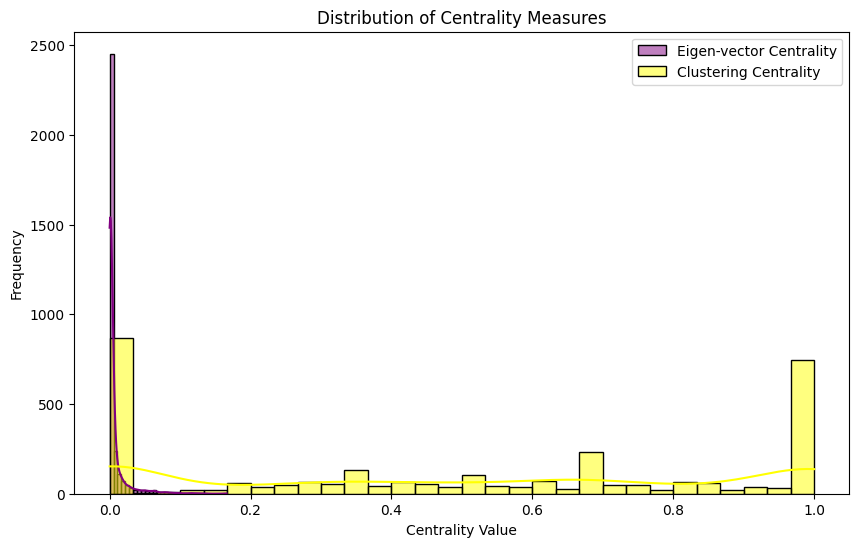

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(list(eigenvector_centrality.values()), bins=30, color='purple', label='Eigen-vector Centrality', kde=True)
sns.histplot(list(clustering_coefficient.values()), bins=30, color='yellow', label='Clustering Centrality', kde=True)
plt.legend()
plt.title('Distribution of Centrality Measures')
plt.xlabel('Centrality Value')
plt.ylabel('Frequency')
plt.show()

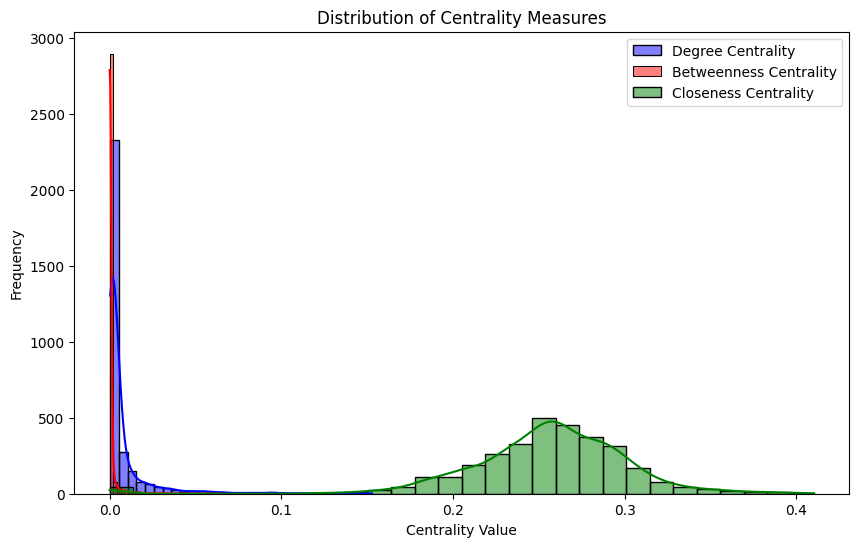

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(list(degree_centrality.values()), bins=30, color='blue', label='Degree Centrality', kde=True)
sns.histplot(list(betweenness_centrality.values()), bins=30, color='red', label='Betweenness Centrality', kde=True)
sns.histplot(list(closeness_centrality.values()), bins=30, color='green', label='Closeness Centrality', kde=True)
plt.legend()
plt.title('Distribution of Centrality Measures')
plt.xlabel('Centrality Value')
plt.ylabel('Frequency')
plt.show()


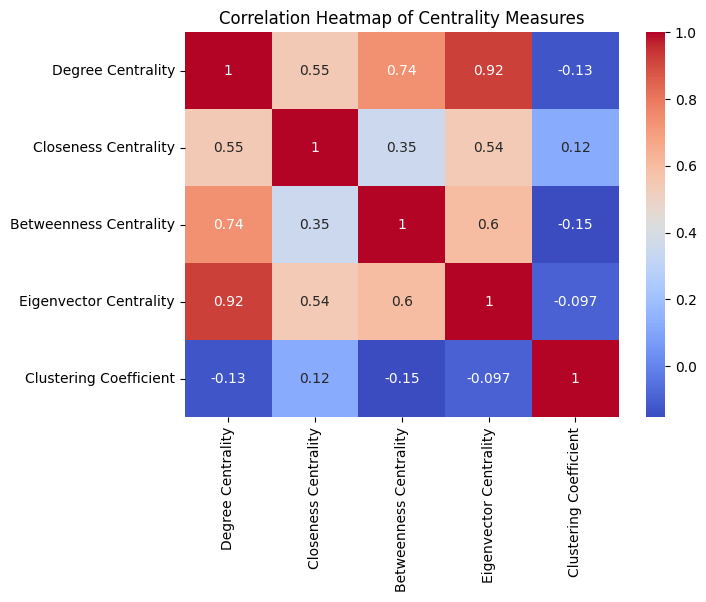

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame
centrality_df = pd.DataFrame({
    "Degree Centrality": degree_centrality,
    "Closeness Centrality": closeness_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Eigenvector Centrality": eigenvector_centrality,
    "Clustering Coefficient": clustering_coefficient
})

# Calculate correlation matrix
corr_matrix = centrality_df.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Centrality Measures')
plt.show()


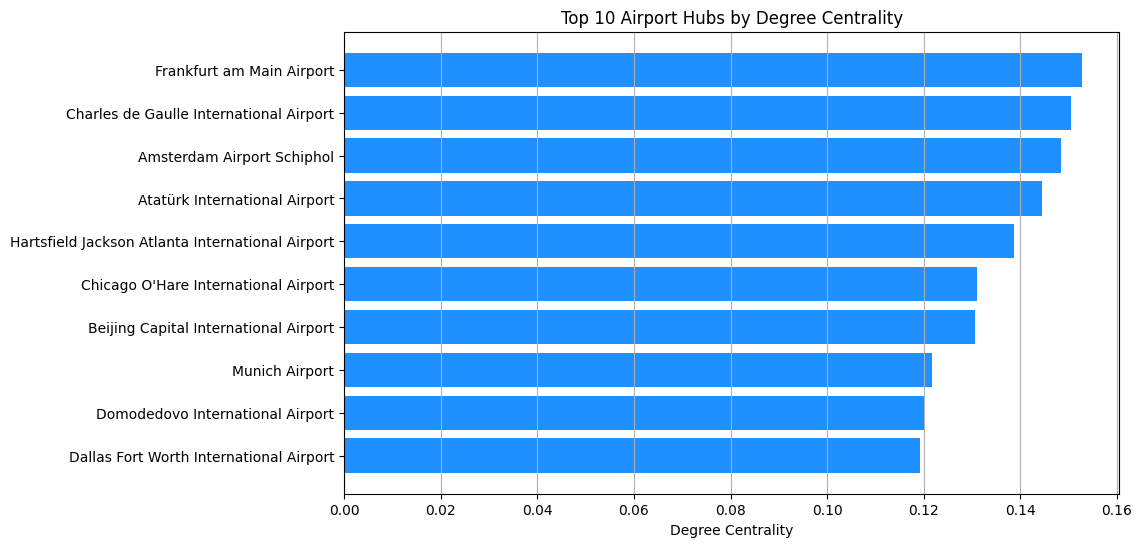

In [29]:
import matplotlib.pyplot as plt

top_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_degree.index[::-1], top_degree['Degree Centrality'][::-1], color='dodgerblue')
plt.xlabel('Degree Centrality')
plt.title('Top 10 Airport Hubs by Degree Centrality')
plt.grid(axis='x')
plt.show()


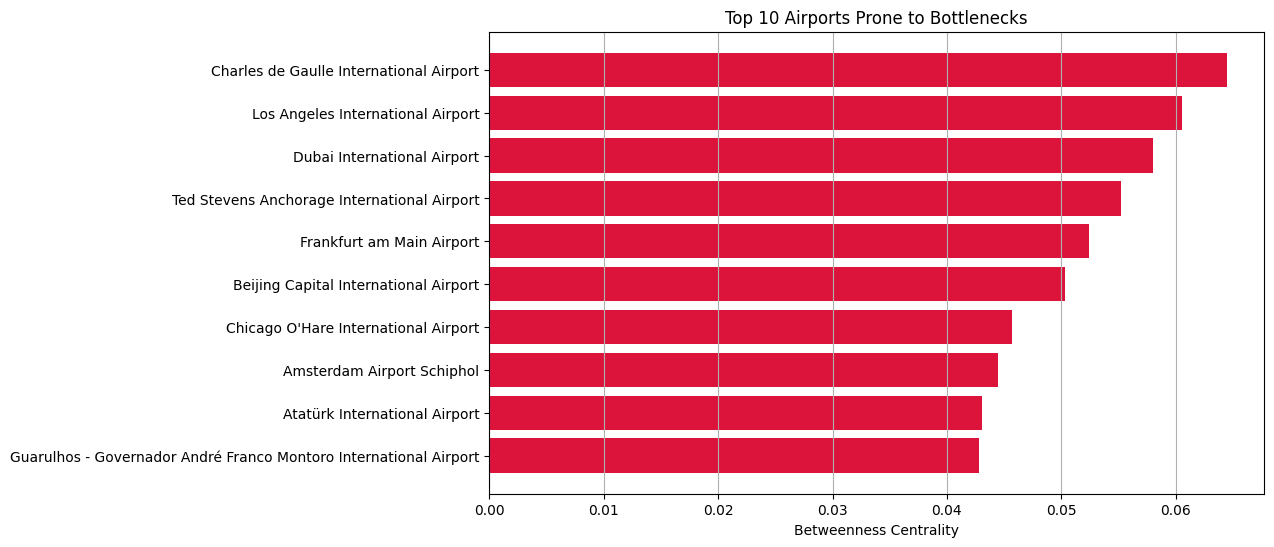

In [30]:
top_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_betweenness.index[::-1], top_betweenness['Betweenness Centrality'][::-1], color='crimson')
plt.xlabel('Betweenness Centrality')
plt.title('Top 10 Airports Prone to Bottlenecks')
plt.grid(axis='x')
plt.show()


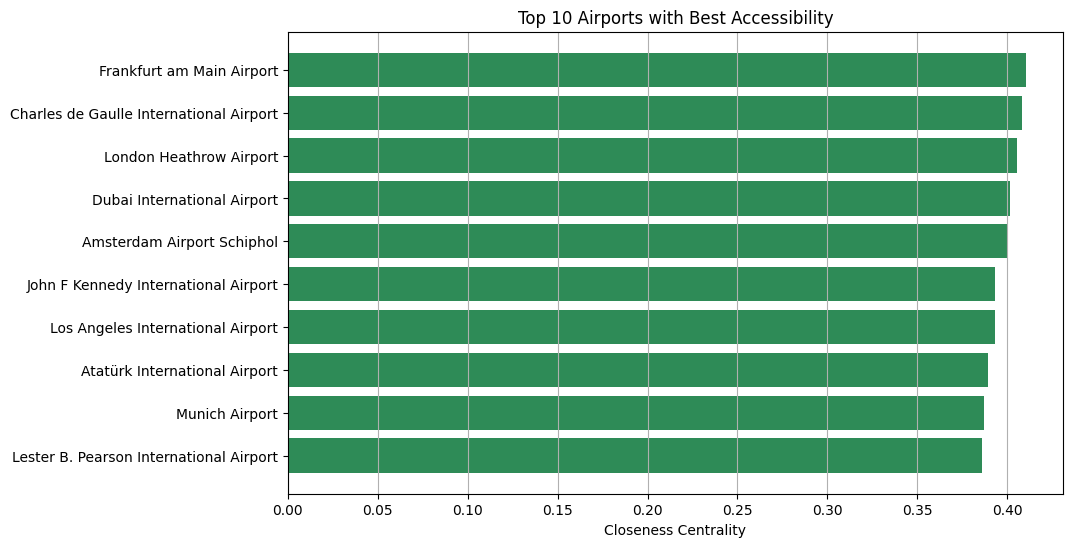

In [31]:
top_closeness = centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_closeness.index[::-1], top_closeness['Closeness Centrality'][::-1], color='seagreen')
plt.xlabel('Closeness Centrality')
plt.title('Top 10 Airports with Best Accessibility')
plt.grid(axis='x')
plt.show()


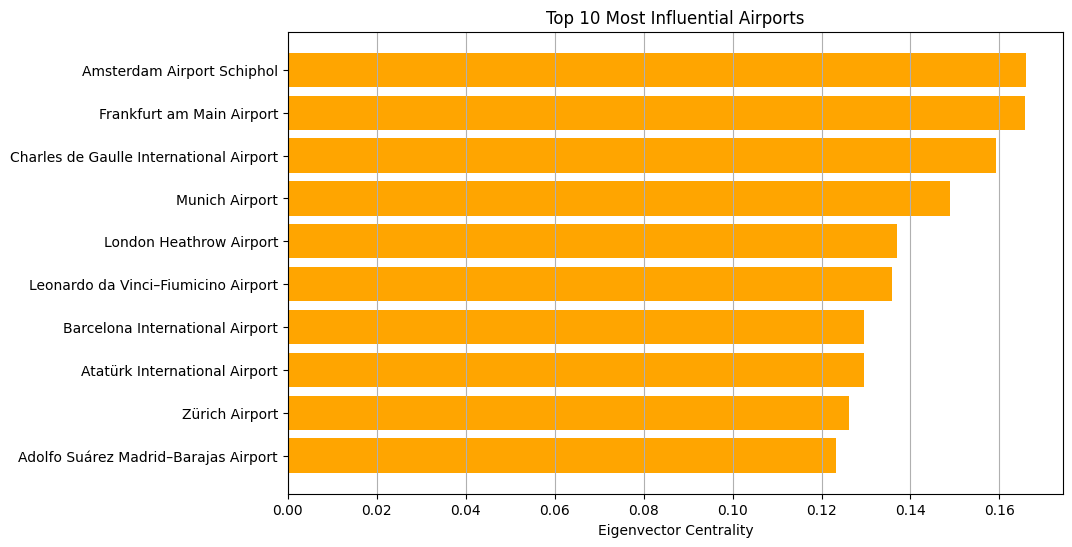

In [32]:
top_eigenvector = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_eigenvector.index[::-1], top_eigenvector['Eigenvector Centrality'][::-1], color='orange')
plt.xlabel('Eigenvector Centrality')
plt.title('Top 10 Most Influential Airports')
plt.grid(axis='x')
plt.show()


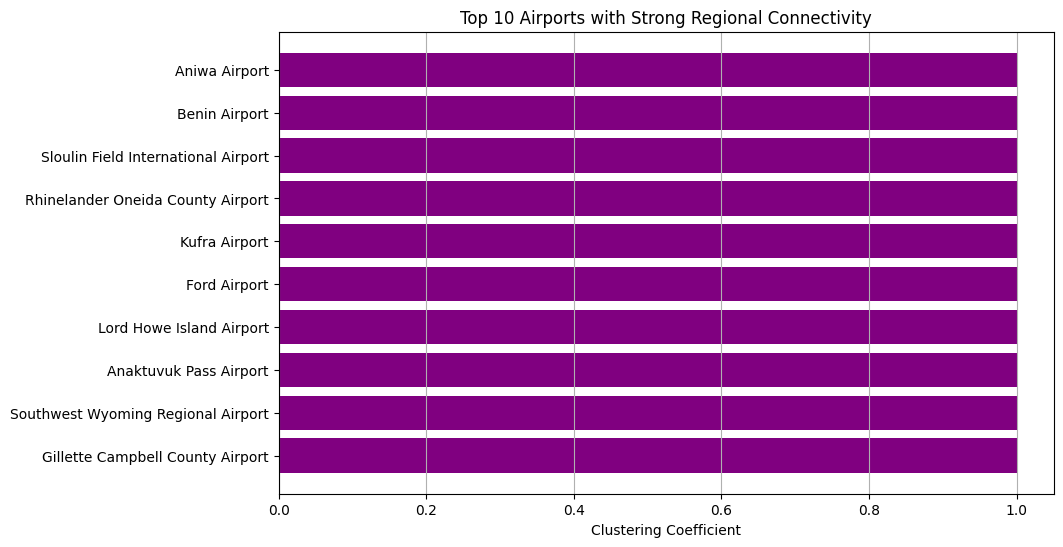

In [33]:
top_clustering = centrality_df.sort_values(by='Clustering Coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_clustering.index[::-1], top_clustering['Clustering Coefficient'][::-1], color='purple')
plt.xlabel('Clustering Coefficient')
plt.title('Top 10 Airports with Strong Regional Connectivity')
plt.grid(axis='x')
plt.show()


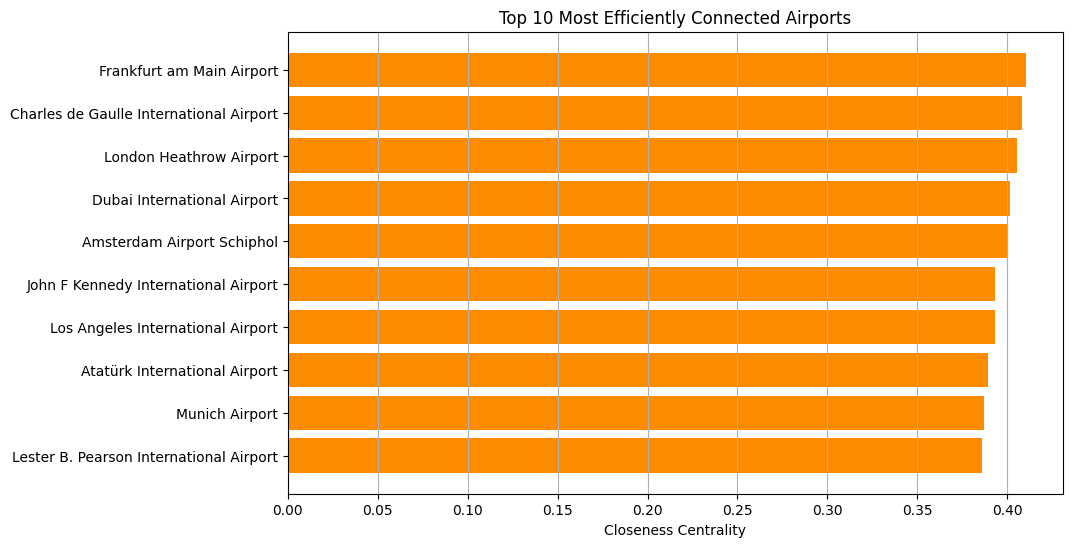

In [34]:
top_closeness = centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_closeness.index[::-1], top_closeness['Closeness Centrality'][::-1], color='darkorange')
plt.xlabel('Closeness Centrality')
plt.title('Top 10 Most Efficiently Connected Airports')
plt.grid(axis='x')
plt.show()


In [35]:
node_degrees = dict(G.degree())

degree_values = list(node_degrees.values())

df_degrees = pd.DataFrame(node_degrees.items(), columns=["Node", "Degree"])

In [36]:
l=[]
for i in df_degrees['Node']:
  exists = i in df['Name_Source'].values
  exist  = i in df['Name_Destination'].values
  if exists==True :
    z=df.loc[df['Name_Source'] == i, 'Country_Source'].values[0]
    l.append(z)
  elif exist == True:
    z=df.loc[df['Name_Destination'] == i, 'Country_Source'].values[0]
    l.append(z)
df_degrees['Country']=l



In [37]:
df_degrees.head()

Node  Degree Country
0    Sochi International Airport      35  Russia
1    Kazan International Airport      42  Russia
2              Astrakhan Airport      14  Russia
3       Mineralnyye Vody Airport      32  Russia
4  Chelyabinsk Balandino Airport      28  Russia

In [38]:
max_c={}
for c in df_degrees['Country'].unique():
  id=df_degrees[df_degrees['Country']==c]['Degree'].idxmax()
  row=df_degrees.iloc[id]
  max_c[c]=[row['Degree'],row['Node']]
countries=[]
Degrees=[]
Node=[]
for c,d in max_c.items():
  countries.append(c)
  Degrees.append(d[0])
  Node.append(d[1])
max_df=pd.DataFrame({'Node':Node,'Degree':Degrees,'Country':countries})


In [39]:
m=[]
n=[]
oo=[]
for i in max_df['Node']:
  exists = i in df['Name_Source'].values
  exist  = i in df['Name_Destination'].values
  if exists==True:
    iz=df.loc[df['Name_Source'] == i].index.values[0]
    m.append(df.iloc[iz]['Latitude_Source'])
    n.append(df.iloc[iz]['Longitude_Source'])



In [40]:
max_df['Latitude']=m
max_df['Longitude']=n

In [41]:
len(max_df['Country'])

225

**International HUBS**

In [42]:
import plotly.graph_objects as go
import pandas as pd

max_df=max_df

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon=max_df['Longitude'],
    lat=max_df['Latitude'],
    text=max_df['Node'],
    mode='markers',
    marker=dict(size=8, color='black'),
    name='Hub Airports'
))

fig.update_geos(
    projection_type="orthographic",
    showland=True, landcolor="rgb(230, 230, 230)",
    showocean=True, oceancolor="rgb(150, 200, 255)"
)

fig.update_layout(title="International HUB Airports", height=700)

fig.show()


In [43]:
a=[]
for i in closeness_centrality :
  a.append(i)
b=[]
for j in closeness_centrality.values():
  b.append(j)


In [44]:
df_close=pd.DataFrame(a,columns=['Node'])

In [45]:
df_close['Closeness']=b

In [46]:
df_close

Node  Closeness
0       Sochi International Airport   0.286745
1       Kazan International Airport   0.288764
2                 Astrakhan Airport   0.275624
3          Mineralnyye Vody Airport   0.297279
4     Chelyabinsk Balandino Airport   0.277667
...                             ...        ...
3118                 Winton Airport   0.207851
3119                Lismore Airport   0.255913
3120              Merimbula Airport   0.260505
3121                 Moruya Airport   0.255935
3122                 Orange Airport   0.255913

[3123 rows x 2 columns]

In [47]:
l=[]
for i in df_close['Node']:
  exists = i in df['Name_Source'].values
  exist  = i in df['Name_Destination'].values
  if exists==True :
    z=df.loc[df['Name_Source'] == i, 'Country_Source'].values[0]
    l.append(z)
  elif exist == True:
    z=df.loc[df['Name_Destination'] == i, 'Country_Source'].values[0]
    l.append(z)

In [48]:
df_close['Country']=l

In [49]:
close_sorted = df_close.sort_values(by='Closeness', ascending=False)

In [50]:
ll=[]
ln=[]
la=0
for i in close_sorted['Node']:
  if  i in df['Name_Source'].values:
    z=df.loc[df['Name_Source'] == i, 'Latitude_Source'].values[0]
    ll.append(z)
    y=df.loc[df['Name_Source'] == i, 'Longitude_Source'].values[0]
    ln.append(y)
    la+=1
  elif i in df['Name_Destination'].values:
    la+=1
    z=df.loc[df['Name_Source'] == i, 'Latitude_Destination'].values
    ll.append(z)
    y=df.loc[df['Name_Source'] == i, 'Longitude_Destination'].values
    ln.append(y)
print(la)

3123


In [51]:
close_sorted['Latitude']=ll
close_sorted['Longitude']=ln

In [52]:
close_sorted.head()

Node  Closeness               Country  \
460                Frankfurt am Main Airport   0.410417               Germany   
407  Charles de Gaulle International Airport   0.408483                France   
425                  London Heathrow Airport   0.405481        United Kingdom   
132              Dubai International Airport   0.401724  United Arab Emirates   
192               Amsterdam Airport Schiphol   0.400187           Netherlands   

      Latitude  Longitude  
460  50.033333   8.570556  
407  49.012798       2.55  
425    51.4706  -0.461941  
132    25.2528  55.364399  
192  52.308601    4.76389

In [53]:
m=[]
n=[]
o=[]
p=[]
q=[]
for i in close_sorted['Country'].unique():
  m.append(close_sorted.loc[close_sorted['Country'] == i, 'Node'].values[0])
  n.append(close_sorted.loc[close_sorted['Country'] == i, 'Closeness'].values[0])
  o.append(close_sorted.loc[close_sorted['Country'] == i, 'Country'].values[0])
  p.append(close_sorted.loc[close_sorted['Country'] == i, 'Latitude'].values[0])
  q.append(close_sorted.loc[close_sorted['Country'] == i, 'Longitude'].values[0])


In [54]:
zx=pd.DataFrame(m,columns=['Node'])
zx.head()

Node
0                Frankfurt am Main Airport
1  Charles de Gaulle International Airport
2                  London Heathrow Airport
3              Dubai International Airport
4               Amsterdam Airport Schiphol

In [55]:
zx['Closeness']=n
zx['Country']=o
zx['Latitude']=p
zx['Longitude']=q

In [56]:
import plotly.graph_objects as go
import pandas as pd


zx=zx


fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon=zx['Longitude'],
    lat=zx['Latitude'],
    text=zx['Node'],
    mode='markers',
    marker=dict(size=8, color='red'),
    name='Hub Airports'
))


fig.update_geos(
    projection_type="orthographic",
    showland=True, landcolor="rgb(230, 230, 230)",
    showocean=True, oceancolor="rgb(150, 200, 255)"
)


fig.update_layout(title="Quick route Airports", height=700)


fig.show()


In [57]:
tail_close=close_sorted.tail(2900)
no_bn=max_df
for i in tail_close['Node']:
  if i in max_df['Node'].values:
    no_bn = no_bn.drop(no_bn[no_bn['Node'] == i].index)

In [58]:
len(no_bn['Country'])

100

In [59]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon=no_bn['Longitude'],
    lat=no_bn['Latitude'],
    text=no_bn['Node'],
    mode='markers',
    marker=dict(size=8, color='GREEN'),
    name='Hub Airports'
))


fig.update_geos(
    projection_type="orthographic",
    showland=True, landcolor="rgb(230, 230, 230)",
    showocean=True, oceancolor="rgb(150, 200, 255)"
)


fig.update_layout(title="MOST EFFICIENT HUBS Without Bottlenecks", height=700)


fig.show()


# **Shortest Path - Dijkstra's algorithm**

In [60]:
# Convert latitude and longitude columns to numeric values
df['Latitude_Source'] = pd.to_numeric(df['Latitude_Source'], errors='coerce')
df['Longitude_Source'] = pd.to_numeric(df['Longitude_Source'], errors='coerce')
df['Latitude_Destination'] = pd.to_numeric(df['Latitude_Destination'], errors='coerce')
df['Longitude_Destination'] = pd.to_numeric(df['Longitude_Destination'], errors='coerce')

# Check for missing or invalid data
print(df[['Latitude_Source', 'Longitude_Source', 'Latitude_Destination', 'Longitude_Destination']].isnull().sum())


Latitude_Source          0
Longitude_Source         0
Latitude_Destination     0
Longitude_Destination    0
dtype: int64


In [61]:
df = df.dropna(subset=['Latitude_Source', 'Longitude_Source', 'Latitude_Destination', 'Longitude_Destination'])


In [62]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Apply the Haversine function to calculate distances
df['Distance (km)'] = df.apply(lambda x: haversine(x['Latitude_Source'], x['Longitude_Source'],
                                                    x['Latitude_Destination'], x['Longitude_Destination']), axis=1)

print("Distance calculation complete. Sample Data:")
df[['Name_Source', 'Name_Destination', 'Distance (km)']].head(10)


Distance calculation complete. Sample Data:


Name_Source             Name_Destination  \
0        Sochi International Airport  Kazan International Airport   
1                  Astrakhan Airport  Kazan International Airport   
2                  Astrakhan Airport     Mineralnyye Vody Airport   
3      Chelyabinsk Balandino Airport  Kazan International Airport   
4      Chelyabinsk Balandino Airport           Tolmachevo Airport   
5   Domodedovo International Airport  Kazan International Airport   
6   Domodedovo International Airport            Begishevo Airport   
8   Domodedovo International Airport              Bugulma Airport   
9     Belgorod International Airport            Khrabrovo Airport   
10    Belgorod International Airport  Kazan International Airport   

    Distance (km)  
0     1506.825604  
1     1040.438320  
2      448.164909  
3      770.508500  
4     1338.631467  
5      715.649350  
6      892.382788  
8      951.432198  
9     1171.881495  
10    1008.253110

In [63]:
import networkx as nx

# Create a directed weighted graph
G = nx.DiGraph()

# Add edges with the airline name as an attribute
for _, row in df.iterrows():
    G.add_edge(row['Name_Source'], row['Name_Destination'],
               weight=row.get('Distance (km)', 1),  # Use 1 if no distance available
               Name_Airline=row['Name_Airline'])


In [64]:
source_airport='Name_Source'
destination_airport='Name_Destination'
import networkx as nx
from networkx.exception import NetworkXNoPath

def search_airport_name(query):
    query = query.strip().lower()
    matches = [airport for airport in G.nodes if query in airport.lower()]
    return matches

source_airport = input("✈️ Enter Source Airport Name: ").strip()
destination_airport = input("🛬 Enter Destination Airport Name: ").strip()

if source_airport not in G:
    print(f"⚠️ '{source_airport}' not found in the graph.")
    matches = search_airport_name(source_airport)
    if matches:
        print("Did you mean one of these?")
        for match in matches:
            print(f" - {match}")
    else:
        print("No similar airports found.")
elif destination_airport not in G:
    print(f"⚠️ '{destination_airport}' not found in the graph.")
    matches = search_airport_name(destination_airport)
    if matches:
        print("Did you mean one of these?")
        for match in matches:
            print(f" - {match}")
    else:
        print("No similar airports found.")
else:
    try:
        # Find shortest path and distance
        shortest_path = nx.shortest_path(G, source=source_airport, target=destination_airport, weight='weight')
        total_distance = nx.shortest_path_length(G, source=source_airport, target=destination_airport, weight='weight')

        print(f"\n🌐 Shortest Path from {source_airport} to {destination_airport}:\n")

        # Display Path with Airports and Airline Names
        for i in range(len(shortest_path) - 1):
            u, v = shortest_path[i], shortest_path[i + 1]
            airline_name = G[u][v].get('Name_Airline', 'Unknown Airline')

            # Plain text output
            print(f"{u} ➡ {v} (Airline: {airline_name})")

        print(f"\n\nTotal Distance: {total_distance:.2f} km")

    except NetworkXNoPath:
        print(f"❗ No path found between {source_airport} and {destination_airport}.")


🌐 Shortest Path from Chennai International Airport to London City Airport:

Chennai International Airport ➡ Frankfurt am Main Airport (Airline: Lufthansa)
Frankfurt am Main Airport ➡ London City Airport (Airline: Lufthansa)


Total Distance: 8214.26 km
